# Estación Moratalaz

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import warnings
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from itertools import product

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

In [5]:
df = pd.read_csv("../data/df_36.csv", index_col=0)
df.index = pd.to_datetime(df.index)

In [6]:
df.head()

,NO2
month,
2013-01-01,39.709677
2013-02-01,31.774194
2013-03-01,25.322581
2013-04-01,23.000000
2013-05-01,24.451613


### Estacionalidad

In [7]:
df2 = df.copy()

In [8]:
df2["año"] = df.index.year
df2["mes"] = df.index.month

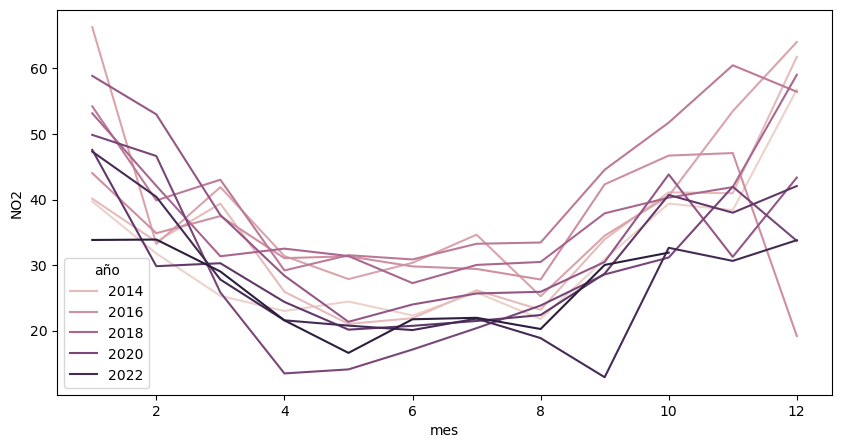

In [9]:
sns.lineplot(x = "mes", y = "NO2", hue = "año", data = df2);

### Estacionaridad

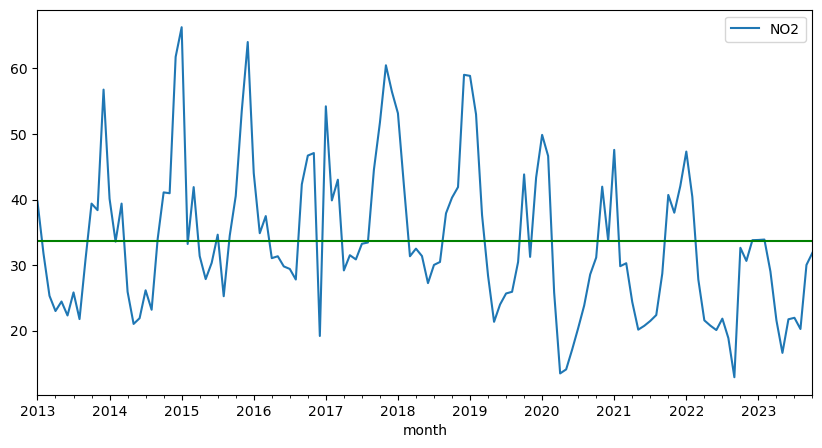

In [10]:
df.plot()
plt.axhline(df.NO2.mean(), c = "g");

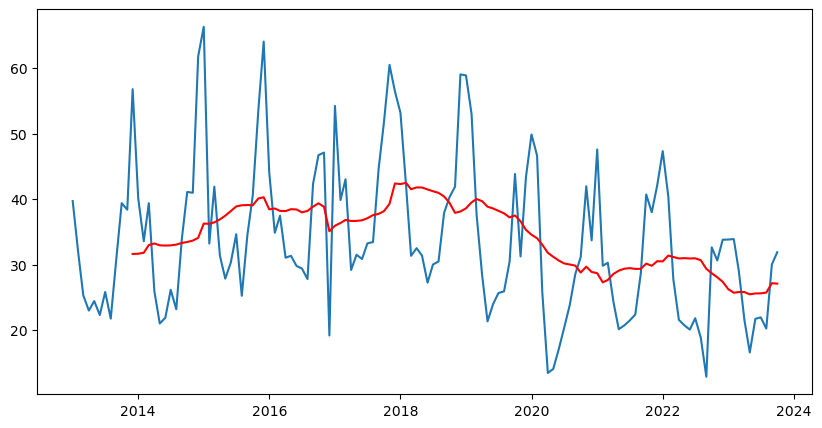

In [11]:
plt.plot(df["NO2"])
plt.plot(df.rolling(window= 12).mean(), c = "r");

### Test de Fuller

In [12]:
res = adfuller(df["NO2"])
res

(-0.7543138905113568,
 0.8321751897452685,
 11,
 118,
 {'1%': -3.4870216863700767,
  '5%': -2.8863625166643136,
  '10%': -2.580009026141913},
 806.8292386361671)

In [13]:
print("AD Fuller Stats", res[0])
print("p-value", res[1])
print("Critical values")

for k, v in res[4].items():
    print(k, round(v, 2))

AD Fuller Stats -0.7543138905113568
p-value 0.8321751897452685
Critical values
1% -3.49
5% -2.89
10% -2.58


*Datos no estacionarios. Su media y su varianza están en función del tiempo 🍋*

### Autocorrelación

In [14]:
for i in range(49):
    print(f"{i} mes Lag, {df['NO2'].autocorr(lag= i)}")

0 mes Lag, 1.0
1 mes Lag, 0.6662161925129075
2 mes Lag, 0.42984119808469107
3 mes Lag, 0.15109539198311522
4 mes Lag, -0.09505456257572288
5 mes Lag, -0.29926436140504725
6 mes Lag, -0.3547824953202343
7 mes Lag, -0.3543443996844273
8 mes Lag, -0.1649824053920959
9 mes Lag, 0.10098982463432324
10 mes Lag, 0.3748189286858723
11 mes Lag, 0.5730023979996021
12 mes Lag, 0.6799082234219542
13 mes Lag, 0.597809885853942
14 mes Lag, 0.39091645645311074
15 mes Lag, 0.15158814090810768
16 mes Lag, -0.16418973201291134
17 mes Lag, -0.39138972450711923
18 mes Lag, -0.4451673456939745
19 mes Lag, -0.42454405214757385
20 mes Lag, -0.23928729230238305
21 mes Lag, 0.02331837632081368
22 mes Lag, 0.2756527807513464
23 mes Lag, 0.4790135875959489
24 mes Lag, 0.5996218145407722
25 mes Lag, 0.5341405448913212
26 mes Lag, 0.31389874284189734
27 mes Lag, 0.0748528370181413
28 mes Lag, -0.18476738421291714
29 mes Lag, -0.3822795971359483
30 mes Lag, -0.46780406514197265
31 mes Lag, -0.43928146920889966
32 m

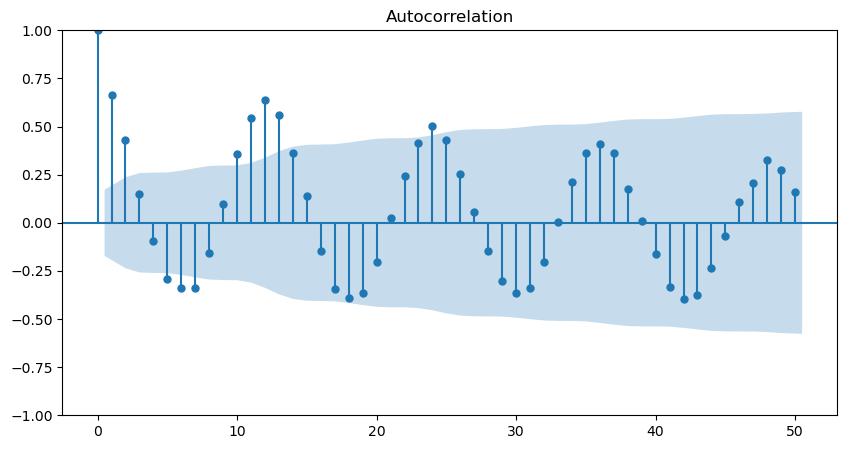

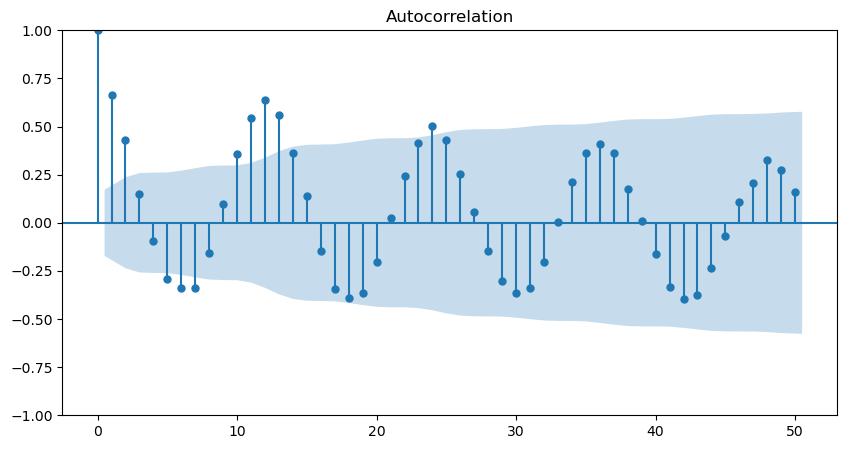

In [15]:
plot_acf(df, lags = 50)

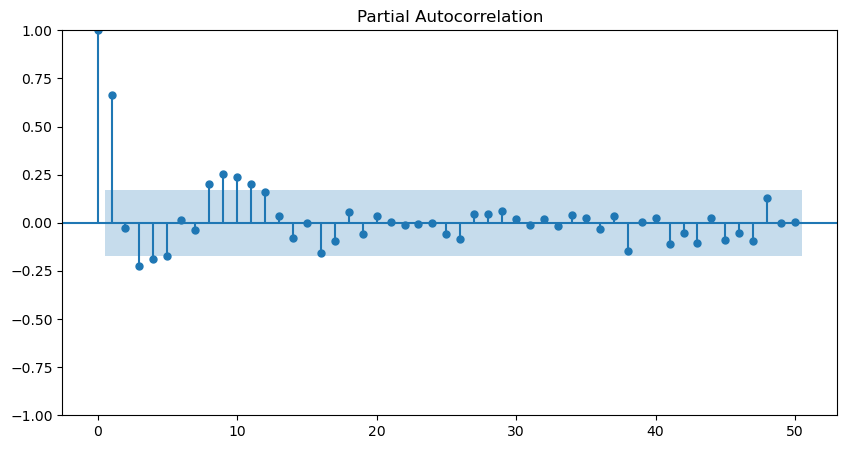

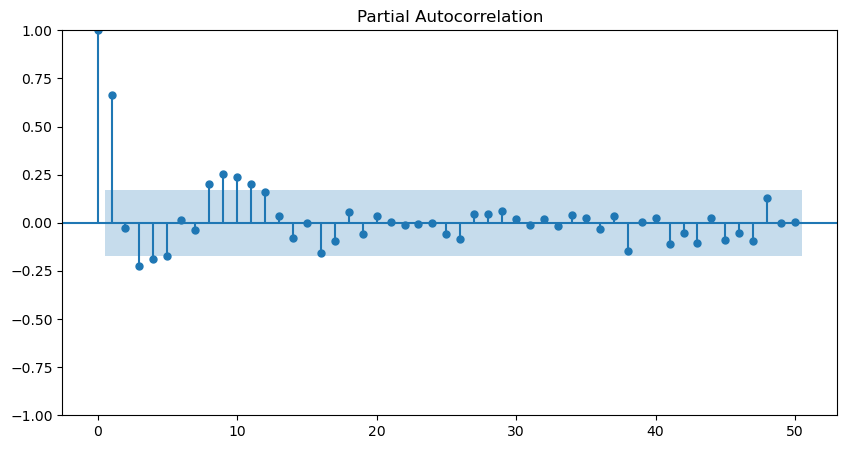

In [16]:
plot_pacf(df, lags = 50)

In [17]:
df.head()

,NO2
month,
2013-01-01,39.709677
2013-02-01,31.774194
2013-03-01,25.322581
2013-04-01,23.000000
2013-05-01,24.451613


In [18]:
df.shape

(130, 1)

In [19]:
df.isnull().sum()

NO2    0
dtype: int64

## SARIMA

In [20]:
y_test = df["NO2"][-30:]
y_train = df["NO2"][:-30]

In [21]:
ps = range(4)
ds = range(1,3)
qs = range(3)

parameters = list(product(ps,ds, qs))
print(parameters)

[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 2, 0), (3, 2, 1), (3, 2, 2)]


In [22]:
%%time

modelo=SARIMAX(endog=y_train, 
               exog=None,
               #order=(4, 1, 5),  # modelo arima
               seasonal_order=(4, 1, 3, 12) # modelo sarima, estacionalidad es el ultimo
              ).fit(disp=False)
                     
pred=modelo.predict(len(y_train), len(df)-1)  

error=(pred-y_test).abs().sum()/len(pred) 
print ('Error mae: ', error)


res=pd.DataFrame({'real':y_test, 'pred':pred, 'error':pred-y_test})
res

C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error mae:  8.325465407476596
CPU times: total: 1.64 s
Wall time: 7.98 s


,real,pred,error
2021-05-01,20.161290,24.765315,4.604025
2021-06-01,20.741935,25.430341,4.688406
2021-07-01,21.483871,28.740797,7.256926
2021-08-01,22.387097,25.925168,3.538072
2021-09-01,28.709677,35.100096,6.390419
2021-10-01,40.709677,41.092215,0.382538
2021-11-01,38.000000,48.330615,10.330615
2021-12-01,42.064516,51.848514,9.783997
2022-01-01,47.322581,46.627395,-0.695186
2022-02-01,40.419355,34.373179,-6.046176


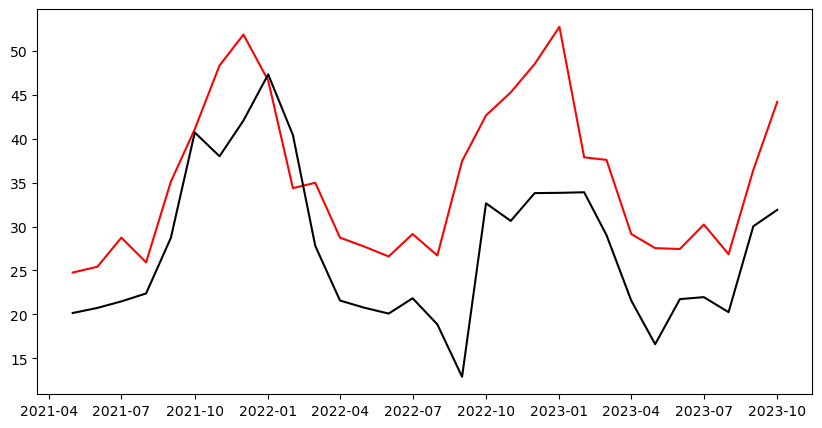

In [23]:
plt.plot(res["pred"], c = "r")
plt.plot(res["real"], c = "black");

In [24]:
pred_año = pd.DataFrame(modelo.predict(start = len(df), end = len(df) + 12))
pred_año

,predicted_mean
2023-11-01,46.265682
2023-12-01,53.605595
2024-01-01,48.759026
2024-02-01,38.992096
2024-03-01,34.964368
2024-04-01,27.157915
2024-05-01,25.883625
2024-06-01,25.352122
2024-07-01,27.852475
2024-08-01,26.594226


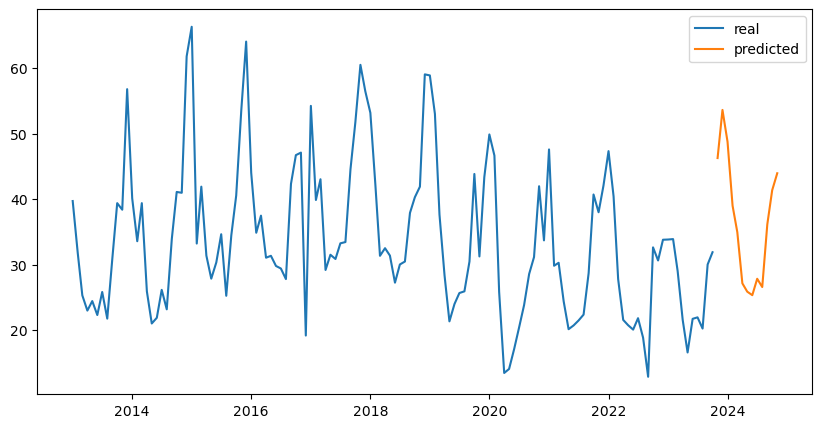

In [25]:
plt.plot(df)
plt.plot(pred_año)
plt.legend(["real", "predicted"]);

In [26]:
pred_año.mean()

predicted_mean    36.683736
dtype: float64